In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
#importing data
MPG = pd.read_csv('D:\\MyStuff\\Datasciencecourse\\Files\\auto-mpg.csv')

In [3]:
#checking data
MPG.head(120)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
115,15.0,8,350.0,145,4082,13.0,73,1,chevrolet monte carlo s
116,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
117,29.0,4,68.0,49,1867,19.5,73,2,fiat 128
118,24.0,4,116.0,75,2158,15.5,73,2,opel manta


In [4]:
MPG.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
#checking for null values
MPG.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
#checking for names of the attributes
for col in MPG:
    print(col)

mpg
cylinders
displacement
horsepower
weight
acceleration
model year
origin
car name


In [7]:
#finding the correlation between the data
MPG_corr= MPG.corr()

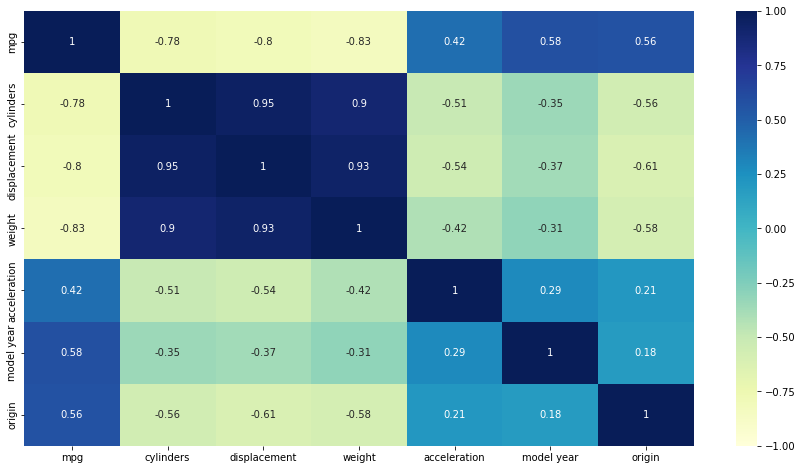

In [8]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
#visualizing the data to find the correlation
sns.heatmap(MPG_corr, annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

In [9]:
MPG_1= MPG.drop('car name',axis=1)
print(MPG_1)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70  

In [10]:
MPG_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [11]:
#remoing "?" from the data
ind_drop = MPG_1[MPG_1['horsepower'].apply(lambda x: x.startswith('?'))].index

In [12]:
clean_df = MPG_1.drop(ind_drop)

In [13]:
clean_df.shape

(392, 8)

In [14]:
#checking for data types
clean_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [15]:
#changing 'object' data type to "int"
clean_df['horsepower'] = pd.to_numeric(clean_df['horsepower'])

In [16]:
clean_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(clean_df.drop(['mpg'],axis=1), 
                                                    clean_df['mpg'], test_size=0.20, 
                                                    random_state=8)

In [19]:
#Training the model on Linear Regression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

80.71763806215979 %


In [21]:
#Training the model on SVR
model = SVR()
model.fit(x_train,y_train)

SVR()

In [22]:
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

67.65557313376614 %


In [23]:
#Training the model on KNN (check for elbow method)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

72.40692993346605 %


In [25]:
#Highest accuracy noted on Linear Regression